<h1>Проект "E-Commerce - Анализ профилей потребления"

<big><strong>Описание проекта

Цель проекта - провести анализ профилей пользователей в интернет-магазине "Пока все ещё тут" для увеличения продаж и создания индивидуального подхода к потребителю.

# ОГЛАВЛЕНИЕ

<a href=#1>Загрузка данных.</a>

<a href=#2>Подготовка данных.</a>
- <a href=#2.1>Приведение типов данных.</a>
- <a href=#2.2>Обработка пропусков и дубликатов.</a>
- <a href=#2.3>Распределение по категориям.</a>
- <a href=#2.4>Добавление вспомогательных столбцов.</a>
- <a href=#2.5>Обработка выбросов.</a>

<a href=#3>Анализ данных.</a>
- <a href=#4.1>Распределение товаров по категориям.</a>
- <a href=#3.2>Динамика продаж по месяцам.</a>
- <a href=#3.3>Динамика продаж по часам.</a>
- <a href=#3.4>Корреляция признаков.</a>

<a href=#4>Сегментация покупателей.</a>
- <a href=#4.1>Распределение товаров по категориям.</a>
- <a href=#4.2>RFM-анализ.</a>
- <a href=#4.3>Численность по сегментам.</a>
- <a href=#4.4>Средние показатели по сегментам.</a>
- <a href=#4.5>Популярность категорий по сегментам.</a>


<a href=#5>Анализ и сегментация товаров.</a>
- <a href=#5.1> Топ 5 продаваемых товаров в каждой категории.</a>
- <a href=#5.2>Выручка и количество покупателей по категориям.</a>
- <a href=#5.3>Сезонность товаров по категориям.</a>

<a href=#6>Формулирование и проверка статистических гипотез.</a>
- <a href=#6.1>Гипотеза о различиях в среднем чеке в зависимости от кластера.</a>
- <a href=#6.2>Сезонность товаров по категориям.</a>

<a href=#7>Выводы.</a>
















# Визуализация (ссылки):

* [Презентация](https://disk.yandex.ru/i/1FevH_sOodxZMg)
* [Дашборд](https://public.tableau.com/app/profile/svetlana.st/viz/Dashboard2_16814769633920/Dashboard1?publish=yes)

# <a name=1>Загрузка данных.</a>

In [157]:
import pandas as pd
import numpy as np
from scipy import stats as st

import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [158]:
google_id='1DkqEQWZoHh22YrsYcNUxSzlhgFqdl0tf'
data = pd.read_csv(f'https://drive.google.com/uc?export=download&id={google_id}')
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


Описание данных:
- дата заказа;
- идентификатор покупателя;
- идентификатор заказа;
- наименование товара;
- количество товара в заказе;
- цена товара.

# <a name=2>Подготовка данных.</a>

### <a name=2.1>Приведение типов данных.</a>

In [160]:
# приведем дату к нужному формату
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         7474 non-null   datetime64[ns]
 1   customer_id  7474 non-null   object        
 2   order_id     7474 non-null   int64         
 3   product      7474 non-null   object        
 4   quantity     7474 non-null   int64         
 5   price        7474 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 350.5+ KB


Привели столбец дат к нужному формату. Видим, что столбцы order_id, quantity и price уже приведены к нужным числовым типам.

### <a name=2.2>Обработка пропусков и дубликатов.</a>

In [162]:
print('Количество дубликатов')
data.duplicated().sum()

Количество дубликатов


0

In [163]:
print('Количество пропусков по столбцам')
data.isna().sum()

Количество пропусков по столбцам


date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

Пропусков и дубликатов в данных нет

In [164]:
# Дата заказа
data['date'].sort_values().unique()

array(['2018-10-01T00:00:00.000000000', '2018-10-01T08:00:00.000000000',
       '2018-10-01T09:00:00.000000000', ...,
       '2020-01-31T02:00:00.000000000', '2020-01-31T12:00:00.000000000',
       '2020-01-31T15:00:00.000000000'], dtype='datetime64[ns]')

Видим, что у нас имеются данные о транзакциях в интернет-магазине за период с 1 октября 2018 года по 31 января 2020 года

Проверим неявные дубликаты

In [165]:
data.drop('date', axis=1).duplicated().sum()

1864

Видим, что без учета даты многие строки повторяются. Возможно, в датасете отображены разные этапы заказа (например, оформление, покупка), которые дублируют информацию об одном и том же заказе. С другой стороны, это может быть ошибка в данных. Очистим неявные дубликаты, сохранив только первую запись о заказе.

In [166]:
data = (data
        .groupby(['customer_id', 'order_id', 'product', 'quantity', 'price'], as_index=False)
        .agg({'date': 'first'}))

In [167]:
data.drop('date', axis=1).duplicated().sum()

0

### <a name=2.3>Распределение по категориям.</a>

In [168]:
categories = {
    'мебель': ['комод', 'стеллаж', 'этажерк', 'полк'],

    'для уборки': ['мыл', 'швабр', 'чистк', 'жир', 'средство', 'совк', 'совок', 'стирк', 'тряпка', 'сушилк', 'гладильн',
                   'веник', 'глаж', 'щетк', 'перчатки', 'губк', 'мойка'],

    'муляжи': ['муляж', 'искуственн'],

    'электроника': ['свет', 'LED', 'электрон', 'электро', 'пылесос', 'миксер', 'электрич',
                    'соковыжималка', 'батарейк', 'фен'
                   ],

    'ремонт': ['сварк', 'стремянк', 'стяжк', 'сверл', 'фрез', 'свёрел', 'сверел', 'угольник',
               'полиров', 'линейка', 'шило', 'крепеж', 'ручка', 'инструмент', 'фал', 'напильн',
               'фиксатор', 'завертка', 'решетка', 'уголок', 'шпингалет', 'насадка'
              ],

    'гигиена': ['зубн', 'мыло', 'крем', 'бальзам', 'маска'],

    'семена': [' г '],

    'рассада': ['рассада'],

    'черенки': ['черенок'],

    'растения': ['растени', 'радермахера', 'хризолидокарпус', 'циперус', 'шеффлера', 'юкка',
                 'герань', 'пеларгония', 'суккулент', 'эхеверия', 'эвкалипт', 'd-',
                 'цвет', 'кориандр', 'афеляндра', 'хризантема', 'бегония',
                    'морковь', 'огурец', 'алиссум', 'гвоздика', 'годеция', 'календула', 'капуста',
                    'космея', 'бархатцы', 'настурция', 'петуния', 'кореопсис', 'лапчатка', 'флокс',
                    'цинерация', 'эшшольция', 'ель', 'цинерария', 'гиностемма', 'кипарис', 'роза',
                    'кодоната', 'черенок', 'плющ', 'куст', 'антуриум', 'примула',
                    'пуансеттия', 'базилик', 'горох', 'земляника', 'дендробиум', 'смесь', 'тюльпан',
                    'укроп', 'томат', 'тимьян', 'тюльпан', 'штангенциркуль', 'декабрист', 'аквилегия',
                    'гипсофила', 'цикламен', 'калибрахоа', 'георгина', 'смолевка', 'ранункулус',
                    'цинния', 'лавр', 'вербейник', 'колокольчик', 'овсянница', 'фуксия', 'эхинацея',
                    'котовник', 'папоротник', 'дыня', 'платикодон', 'энотера', 'виноград', 'виола',
                    'лобелия', 'вербена', 'пиретрум', 'клубника', 'арбуз', 'хоста',
                    'маттиола', 'осина', 'барвинок', 'рудбекия', 'монарда', 'астра', 'седум',
                    'солидаго', 'лен', 'камнеломка', 'бузульник', 'вероника', 'физостегия', 'бадан',
                    'лаватера', 'лаванда', 'петрушка', 'шалфей', 'табак', 'в кассете', 'анемона', 'кашпо'
                   ],

    'для дома': ['чехол', 'коврик', 'ковер', 'ковёр', 'ковр', 'прищеп', 'штор', 'петл', 'утюг', 'термометр', 'подставк',
                 'рамка', 'ключ', 'весы', 'пуф', 'ролик', 'зажигал'],

    'для спальни': ['матрас', 'одеял', 'плед', 'простын', 'подушк', 'покрывал', 'подголов', 'ткань', 'матрац', 'наволочк'],

    'для кухни': ['сковород', 'тарелк', 'вилк', 'ложк', 'нож', 'котел', 'круж', 'скатерт', 'кувшин', 'толкушка', 'чайник',
                  'банк', 'фужер', 'кух', 'против', 'салфетк', 'рукав', 'чай', 'салат', 'варка', 'лопатка', 'стакан', 'масл',
                  'терк', 'бокал', 'силикон', 'мялка', 'миска', 'пресс', 'кондитер', 'форм', 'столов', 'термос', 'блюдц',
                  'соль', 'бульон', 'хлеб', 'доска', 'кастрюл', 'колка', 'торт', 'сито', 'венчик', 'блюдо', 'посуд',
                  'скребок', 'сотейник', 'сахар', 'половник', 'кипятильник'],

    'для ванной': ['ерш', 'ёрш', 'ванн', 'туалет', 'унитаз', 'полотен', 'вантуз', 'халат'],

    'для хранения': ['таз', 'вешал', 'крючок', 'корзин', 'сумк', 'контейнер', 'плечики', 'тележк', 'ящик', 'ведр', 'ковш',
                     'урна', 'кофр', 'коробка', 'емкост', 'бидон', 'лоток', 'пакет']
}

def categorize_item(item):
    for key, values in categories.items():
        for value in values:
            if value in item.lower():
                return key
    return 'неизвестно'

In [169]:
data['category'] = data['product'].apply(categorize_item)
data.tail()

,customer_id,order_id,product,quantity,price,date,category
5605,ff601403-b094-4b86-9ac6-264d725b9277,105169,"Вербена Red красная объем 0,5 л",1,90.0,2020-01-19 11:00:00,растения
5606,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0,2019-10-30 07:00:00,для хранения
5607,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,69369,Новогоднее дерево Ель канадская Коника ртк 343...,1,389.0,2018-12-14 23:00:00,растения
5608,ffb80538-3fda-4351-8ea9-9d2bec58bb07,72561,Стакан для ванной комнаты ETNA SHINY керамика ...,1,974.0,2019-09-09 12:00:00,для кухни
5609,ffe82299-3f5b-4214-87fe-3d36ecccfac3,73060,"Сушилка для белья потолочная Лиана 1,8 м 1703007",1,577.0,2019-10-22 13:00:00,для уборки


In [170]:
print('Количество товаров, не распределенных по категориям')
print(len(data[data.category == 'неизвестно']['product'].to_list()))

Количество товаров, не распределенных по категориям
0


### <a name=2.4>Добавление вспомогательных столбцов.</a>

In [171]:
data['price_total'] = data['price'] * data['quantity']
data['month'] = data['date'].apply(lambda row: row.strftime('%Y-%m'))
data['hour'] = data['date'].apply(lambda row: row.hour)
data.tail()

,customer_id,order_id,product,quantity,price,date,category,price_total,month,hour
5605,ff601403-b094-4b86-9ac6-264d725b9277,105169,"Вербена Red красная объем 0,5 л",1,90.0,2020-01-19 11:00:00,растения,90.0,2020-01,11
5606,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0,2019-10-30 07:00:00,для хранения,397.0,2019-10,7
5607,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,69369,Новогоднее дерево Ель канадская Коника ртк 343...,1,389.0,2018-12-14 23:00:00,растения,389.0,2018-12,23
5608,ffb80538-3fda-4351-8ea9-9d2bec58bb07,72561,Стакан для ванной комнаты ETNA SHINY керамика ...,1,974.0,2019-09-09 12:00:00,для кухни,974.0,2019-09,12
5609,ffe82299-3f5b-4214-87fe-3d36ecccfac3,73060,"Сушилка для белья потолочная Лиана 1,8 м 1703007",1,577.0,2019-10-22 13:00:00,для уборки,577.0,2019-10,13


<big>Вывод</big>

Привели столбцы к нужному формату. Добавили столбцы категорий товаров, стоимости покупки и месяца покупки. Дубликатов и пропусков нет, данные готовы к анализу.

### <a name=2.5>Обработка выбросов.</a>

Сгруппируем датасет по заказам

In [172]:
grouped_by_orders = data.groupby(['customer_id', 'order_id']).agg({'price_total': 'sum',
                                                                   'price': 'mean',
                                                                   'product': 'count',
                                                                   'quantity': 'sum',
                                                                   'date': 'first'}).reset_index()
grouped_by_orders = grouped_by_orders.rename(columns = {'price_total': 'order_price',
                                                        'price': 'avg_price_of_product',
                                                        'product': 'products_in_order',
                                                        'quantity': 'goods_in_order'})
grouped_by_orders.head()

,customer_id,order_id,order_price,avg_price_of_product,products_in_order,goods_in_order,date
0,000d6849-084e-4d9f-ac03-37174eaf60c4,14943,555.0,138.75,4,4,2019-10-16 08:00:00
1,001cee7f-0b29-4716-b202-0042213ab038,70290,442.0,442.00,1,1,2019-02-16 11:00:00
2,00299f34-5385-4d13-9aea-c80b81658e1b,72965,914.0,457.00,1,2,2019-10-14 23:00:00
3,002d4d3a-4a59-406b-86ec-c3314357e498,69990,1649.0,1649.00,1,1,2019-01-27 17:00:00
4,003bbd39-0000-41ff-b7f9-2ddaec152037,72796,2324.0,1162.00,1,2,2019-09-29 17:00:00


Сгруппируем датасет по пользователям

In [173]:
grouped_by_customers = grouped_by_orders.groupby('customer_id').agg({'order_id': 'nunique',
                                                                    'order_price': ['sum', 'mean'],
                                                                    'avg_price_of_product': 'mean',
                                                                    'products_in_order': 'mean',
                                                                    'goods_in_order': 'mean'})
grouped_by_customers.columns = ['orders', 'total_revenue', 'avg_order_price', 'avg_price_of_product',
                                'avg_products_in_order', 'avg_goods_in_order']
grouped_by_customers.head()

,orders,total_revenue,avg_order_price,avg_price_of_product,avg_products_in_order,avg_goods_in_order
customer_id,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,1,555.0,555.0,138.75,4.0,4.0
001cee7f-0b29-4716-b202-0042213ab038,1,442.0,442.0,442.00,1.0,1.0
00299f34-5385-4d13-9aea-c80b81658e1b,1,914.0,914.0,457.00,1.0,2.0
002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.0,1649.0,1649.00,1.0,1.0
003bbd39-0000-41ff-b7f9-2ddaec152037,1,2324.0,2324.0,1162.00,1.0,2.0


In [174]:
# Напишем функцию для построения боксплота
def boxplot(df, column, title, xlabel, lim):
    plt.figure(figsize=(15,3))
    plt.title(title+' на 1 пользователя')
    plt.boxplot(df[column], vert=False)
    plt.xlabel(xlabel)
    plt.xlim(0,lim)
    plt.show()

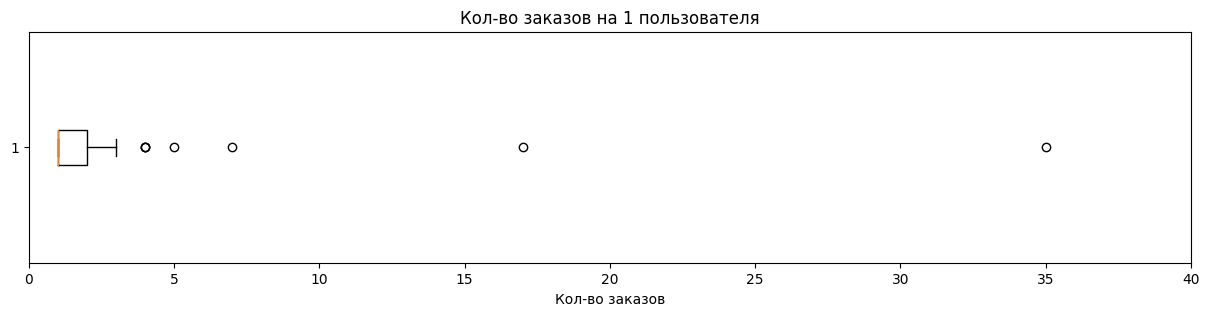

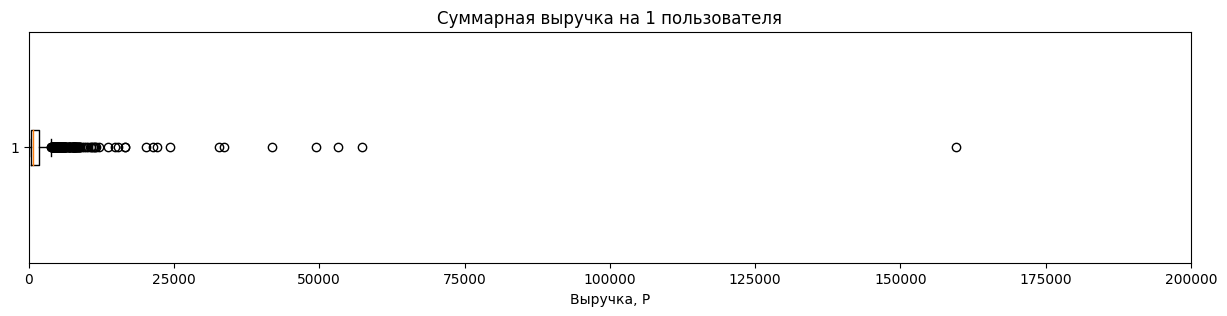

In [175]:
boxplot(grouped_by_customers, 'orders', 'Кол-во заказов', 'Кол-во заказов',  40)
boxplot(grouped_by_customers, 'total_revenue', 'Суммарная выручка', 'Выручка, Р',  200000)

In [176]:
# Составим списки с id клиентов, у которыз аномально большая выручка и количество заказов
print('Аномально большое количество заказов у пользователей: > {:.0f}'.format(np.percentile(grouped_by_customers['orders'], 99)))
print('Аномально большая выручка по клиентам: > {:.0f} Р'.format(np.percentile(grouped_by_customers['total_revenue'], 99)))

Аномально большое количество заказов у пользователей: > 3
Аномально большая выручка по клиентам: > 10042 Р


In [177]:
abnormal_orders_users = grouped_by_customers[grouped_by_customers['orders'] > np.percentile(grouped_by_customers['orders'], 99)].index.to_list()
abnormal_revenue_users = grouped_by_customers[grouped_by_customers['total_revenue'] > np.percentile(grouped_by_customers['total_revenue'], 99)].index.to_list()
abnormal_users = pd.concat([pd.Series(abnormal_orders_users), pd.Series(abnormal_revenue_users)]).to_list()

Посмотрим на некоторые аномальные заказы

In [178]:
print(data.query('customer_id in @abnormal_users')[['product', 'quantity', 'price_total']]
      .sort_values(by='price_total', ascending=False).head())
print(data.query('customer_id in @abnormal_users')[['product', 'quantity', 'price_total']]
      .sort_values(by='quantity', ascending=False).head())

                                                product  quantity  price_total
1044  Вантуз с деревянной ручкой d14 см красный, Bur...      1000     675000.0
410    Вешалки мягкие для деликатных вещей 3 шт шоколад       334      49432.0
1939  Простынь вафельная 200х180 см WELLNESS RW180-0...        27      47385.0
2302  Тележка багажная DELTA ТБР-22 синий грузоподъе...        57      32718.0
3073      Набор ножей Attribute CHEF 5 предметов AKF522        64      29248.0
                                                product  quantity  price_total
1044  Вантуз с деревянной ручкой d14 см красный, Bur...      1000     675000.0
410    Вешалки мягкие для деликатных вещей 3 шт шоколад       334      49432.0
2024                          Муляж ЯБЛОКО 9 см красное       300      15300.0
3073      Набор ножей Attribute CHEF 5 предметов AKF522        64      29248.0
4222        Стяжка оконная с болтом СТ-55 цинк, 1108354        64       1216.0


Скорее всего, покупатель не станет покупать для личного пользователя более 200 муляжей, вешалок или вантузов. Такие покупки могут быть связаны с оптовыми или совместными закупками. Нас интересует персонализированный подход к покупателям, поэтому следует исключить подобных покупателей из анализа.

In [179]:
print('Покупателей с аномально большой выручкой: {}'.format(len(abnormal_revenue_users)))
print('Покупателей с аномально большим количеством заказов: {}'.format(len(abnormal_orders_users)))
print('Всего покупателей: {}'.format(len(grouped_by_customers)))
print('Всего товаров: {}'.format(data['product'].nunique()))

Покупателей с аномально большой выручкой: 25
Покупателей с аномально большим количеством заказов: 8
Всего покупателей: 2451
Всего товаров: 2343


Уберем аномальных покупателей из наших данных

In [180]:
data = data.query('customer_id not in @abnormal_users')

# <a name=3>Анализ данных.</a>

### <a name=4.1>Распределение товаров по категориям.</a>

Проанализируем показатели в группировке по пользователям

In [181]:
print('Всего покупателей: {}'.format(len(grouped_by_customers)))
print('Всего заказов: {}'.format(len(data['order_id'].unique())))
print('Среднее количество заказов на одного покупателя (по моде): {}'.format(grouped_by_customers['orders'].mode()[0]))
print('Средняя выручка по покупателям составляет: {}Р'.format(grouped_by_customers['total_revenue'].median()))
print('Средняя сумма заказа составляет: {}Р'.format(grouped_by_customers['avg_order_price'].median()))
print('Средняя стоимость продукта по пользователям составляет: {}Р'.format(grouped_by_customers['avg_price_of_product'].median()))
print('Среднее кол-во позиций в заказе по пользователям: {}'.format(grouped_by_customers['avg_products_in_order'].median()))
print('Среднее кол-во единиц товара в заказе по пользователям: {}'.format(grouped_by_customers['avg_goods_in_order'].median()))

Всего покупателей: 2451
Всего заказов: 3287
Среднее количество заказов на одного покупателя (по моде): 1
Средняя выручка по покупателям составляет: 840.0Р
Средняя сумма заказа составляет: 652.0Р
Средняя стоимость продукта по пользователям составляет: 340.5Р
Среднее кол-во позиций в заказе по пользователям: 1.0
Среднее кол-во единиц товара в заказе по пользователям: 1.0


In [182]:
grouped_by_customers.describe().loc['mean':]

,orders,total_revenue,avg_order_price,avg_price_of_product,avg_products_in_order,avg_goods_in_order
mean,1.450020,1896.702740,1446.798856,712.192266,1.743571,5.033406
std,2.677848,14267.983568,13771.361274,1024.282172,2.896855,25.245797
min,1.000000,15.000000,15.000000,14.000000,1.000000,1.000000
25%,1.000000,396.500000,300.000000,134.000000,1.000000,1.000000
50%,1.000000,840.000000,652.000000,340.500000,1.000000,1.000000
75%,2.000000,1798.500000,1348.500000,899.250000,1.000000,3.000000
max,126.000000,675000.000000,675000.000000,14917.000000,51.000000,1000.000000


Как мы видим, покупатели редко возвращаются и, как правило, совершают разовые покупки по 1-2 товара в количестве 1-3 шт.

Средняя выручка с одного пользователя составляет 824Р

Средняя сумма заказа составляет 789Р

 Менеджерам стоит поработать с удержанием покупателей.

### <a name=3.2>Динамика продаж по месяцам.</a>

Посмотрим динамику продаж по месяцам

In [183]:
# Напишем функцию построения функции динамики по месяцам
def dynamics(df, xcol, ycol, title, xaxis, yaxis):
    plt.figure(figsize=(5, 3))
    plt.plot(df[xcol], df[ycol], linestyle='-', marker='o')
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

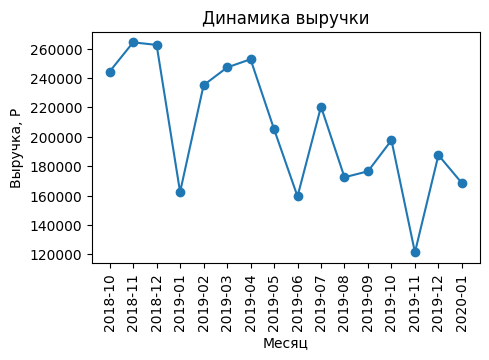

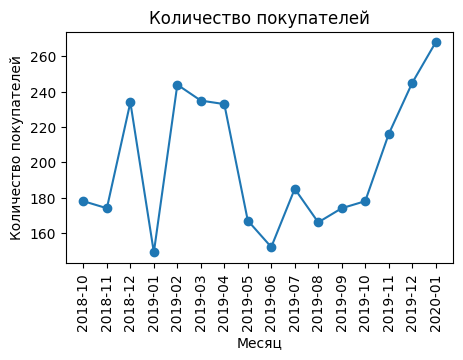

In [184]:
grouped_by_date = data.groupby('month').agg({'customer_id': 'nunique',
                                             'price_total': 'sum'}).reset_index()

dynamics(grouped_by_date, 'month', 'price_total', 'Динамика выручки', 'Месяц', 'Выручка, Р')
dynamics(grouped_by_date, 'month', 'customer_id', 'Количество покупателей', 'Месяц', 'Количество покупателей')

После того, как мы обработали выбросы, график стабилизировался. Как мы видим, выраженной сезонности по продажам нет

### <a name=3.3>Динамика продаж по часам.</a>

Посмотрим динамику продаж в течение дня

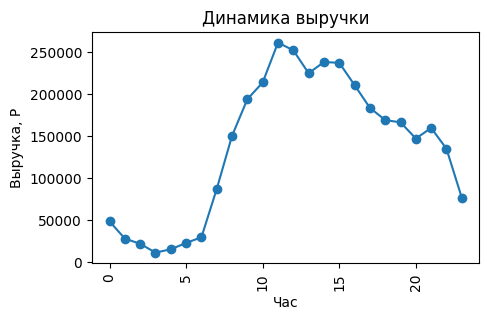

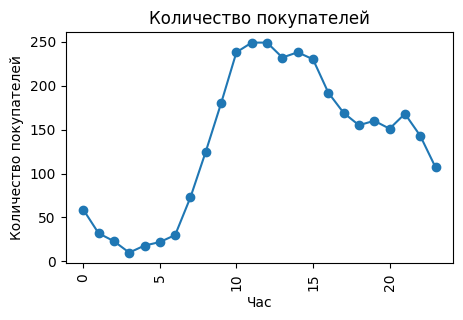

In [185]:
grouped_by_hour = data.groupby('hour').agg({'customer_id': 'nunique',
                                             'price_total': 'sum'}).reset_index()

dynamics(grouped_by_hour, 'hour', 'price_total', 'Динамика выручки', 'Час', 'Выручка, Р')
dynamics(grouped_by_hour, 'hour', 'customer_id', 'Количество покупателей', 'Час', 'Количество покупателей')

Из графиков видим, что рост продаж начинается после 6 утра и достигает пика к полудню.

### <a name=3.4>Корреляция признаков.</a>

In [186]:
# Напишем функцию построения хитмапа
def heatmap(df, title, figsize, fmt='.1%'):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.heatmap(df, annot=True, square=True, cmap='coolwarm', fmt=fmt)
    plt.show()

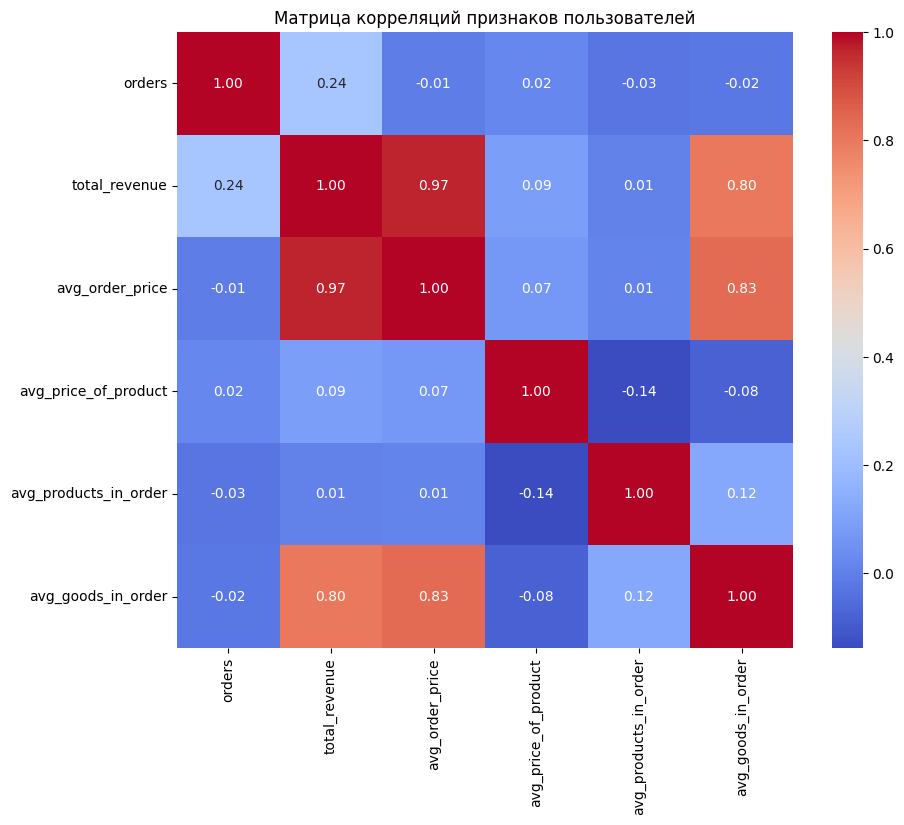

In [187]:
heatmap(grouped_by_customers.corr(), 'Матрица корреляций признаков пользователей', (10, 8), '.2f')

По матрице корреляций видно, что некоторые признаки связаны по логичным причинам. Например, средний чек влияет на общую выручку, а средняя цена товара - на оба этих признака.

В дополнение, можно заметить, что в среднем чем больше товаров в заказе, тем меньше их средняя стоимость.

# <a name=4>Сегментация покупателей.</a>

### <a name=4.1>Распределение товаров по категориям.</a>

Мы разбили товары на категории на шаге 2, проверим получившиеся категории.

In [188]:
# Выведем список полученных категорий и их соотношение
categoryzer_df = data.groupby('category').agg({'product': 'count'}).reset_index()
categoryzer_df.columns = ['category', 'rows']
categoryzer_df['percent_of_rows'] = (categoryzer_df['rows'] / len(data)).round(3)
categoryzer_df = categoryzer_df.sort_values(by='percent_of_rows', ascending=False)
categoryzer_df['percent_of_rows'] = categoryzer_df['percent_of_rows'].map('{:.1%}'.format)
print(categoryzer_df)
print('\nСтрок без категории: {}'.format(len(data[data['category'] == 'неизвестно'])))

        category  rows percent_of_rows
10      растения  1951           37.0%
9        рассада   647           12.3%
5     для уборки   603           11.4%
6   для хранения   486            9.2%
3      для кухни   364            6.9%
13       черенки   343            6.5%
2       для дома   266            5.0%
8         муляжи   197            3.7%
11        ремонт   117            2.2%
1     для ванной    81            1.5%
12        семена    60            1.1%
14   электроника    58            1.1%
7         мебель    45            0.9%
0        гигиена    32            0.6%
4    для спальни    22            0.4%

Строк без категории: 0


Всего получили 15 категорий товаров. Больше всего товаров в категориях "растения", "рассада" и "для уборки".

### <a name=4.2>RFM-анализ.</a>

Добавим дату последней покупки для каждого покупателя

In [189]:
df_dates = data.groupby('customer_id')['date'].max().reset_index()
df_dates.columns = ['customer_id', 'last_purchase_date']
max_date = data['date'].max()
df_dates['recency'] = (max_date - df_dates['last_purchase_date']).dt.days

Посчитаем частоту покупок для каждого покупателя

In [190]:
df_frequency = data.groupby('customer_id')['order_id'].count().reset_index()
df_frequency.columns = ['customer_id', 'frequency']

Рассчитаем сумму, потраченную каждым покупателем

In [191]:
df_monetary = data.groupby('customer_id')['price_total'].sum().reset_index()
df_monetary.columns = ['customer_id', 'monetary']

Создадим таблицу с количеством покупок покупателя в категории товара

Объединим все таблицы в одну

In [192]:
df_rfm = df_dates.merge(df_frequency, on='customer_id').merge(df_monetary, on='customer_id')
df_rfm.head()

,customer_id,last_purchase_date,recency,frequency,monetary
0,000d6849-084e-4d9f-ac03-37174eaf60c4,2019-10-16 08:00:00,107,4,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,2019-02-16 11:00:00,349,1,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,2019-10-14 23:00:00,108,1,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,2019-01-27 17:00:00,368,1,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2019-09-29 17:00:00,123,1,2324.0


Разобьем клиентов на группы на основе значений RFM

In [193]:
# Напишем функцию для присвоения ранга
def assign_ranks(column, reverse=False):
    if reverse:
        return pd.qcut(column.rank(method='first'), q=5, labels=range(5, 0, -1))
    else:
        return pd.qcut(column.rank(method='first'), q=5, labels=range(1, 6))

In [194]:
df_rfm['RecencyRank'] = assign_ranks(df_rfm['recency'], reverse=True)
df_rfm['FrequencyRank'] = assign_ranks(df_rfm['frequency'])
df_rfm['MonetaryRank'] = assign_ranks(df_rfm['monetary'])

In [195]:
# Создадим новый столбец с комбинированными рангами
df_rfm['RFM'] = df_rfm.apply(lambda row: str(row['RecencyRank']) + str(row['FrequencyRank'])
                                                                      + str(row['MonetaryRank']), axis=1)

In [196]:
# Напишем функцию, присваивающую каждой группе название
def rfm_level(score):
    total_score = (int(score[0]) + int(score[1]) + int(score[2])) / 3
    if total_score >= 4:
        return 'Top'
    elif total_score >= 3:
        return 'Middle'
    elif total_score >= 2:
        return 'Low'
    else:
        return 'Bottom'

In [197]:
df_rfm['RFM_level'] = df_rfm['RFM'].apply(rfm_level)
df_rfm.tail()

,customer_id,last_purchase_date,recency,frequency,monetary,RecencyRank,FrequencyRank,MonetaryRank,RFM,RFM_level
2417,ff601403-b094-4b86-9ac6-264d725b9277,2020-01-19 11:00:00,12,2,1739.0,5,5,4,554,Top
2418,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,2019-10-30 07:00:00,93,1,397.0,4,3,2,432,Middle
2419,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,2018-12-14 23:00:00,412,1,389.0,1,3,2,132,Low
2420,ffb80538-3fda-4351-8ea9-9d2bec58bb07,2019-09-09 12:00:00,144,1,974.0,3,3,3,333,Middle
2421,ffe82299-3f5b-4214-87fe-3d36ecccfac3,2019-10-22 13:00:00,101,1,577.0,4,3,2,432,Middle


### <a name=4.3>Численность по сегментам.</a>

Сравним кластеры по численности

In [198]:
for group in ('Top', 'Middle', 'Low', 'Bottom'):
    print(f"{group}: {len(df_rfm[df_rfm['RFM_level'] == group])} клиентов")
    print()

Top: 572 клиентов

Middle: 767 клиентов

Low: 769 клиентов

Bottom: 314 клиентов



Видим, что больше всего клиентов ожидаемо попало во 2 и 3 группы.

### <a name=4.4>Средние показатели по сегментам.</a>

In [199]:
df_rfm.groupby('RFM_level')[['recency', 'frequency', 'monetary']].mean().T

RFM_level,Bottom,Low,Middle,Top
recency,354.808917,285.507152,193.870926,72.674825
frequency,1.003185,1.188557,2.663625,3.496503
monetary,311.394904,918.280884,1434.876358,2400.129808


Сегменты покупателей составлены на основании RFM-теста

In [200]:
# Напишем функцию для построения столбчатой диаграммы
def bar(df, x, y, title, xaxis, yaxis, ascending=False):
    df = df.sort_values(by=y, ascending=ascending).reset_index(drop=True)

    plt.figure(figsize=(6, 4))
    bars = plt.bar(df[x], df[y])

    # Добавляем значения над каждым столбцом
    for idx, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(df[y][idx]), ha='center', va='bottom')

    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(title)

    # Разворачиваем подписи на оси X вертикально
    plt.xticks(rotation=90)

    plt.show()

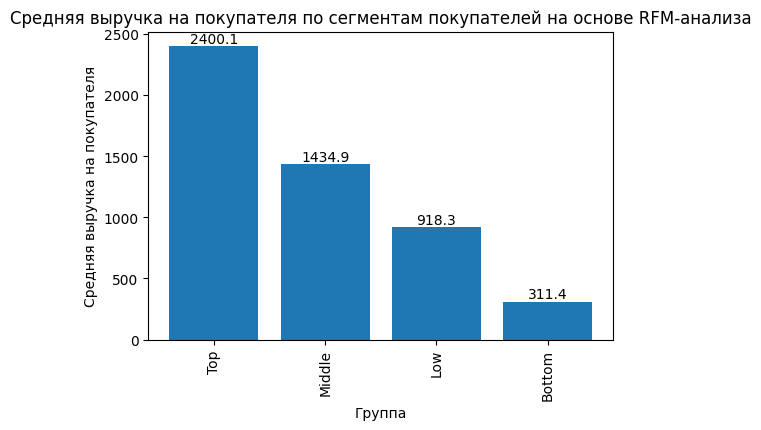

In [201]:
bar(df_rfm.groupby('RFM_level', as_index=False).agg({'monetary': lambda x: (round(x.mean(), 1))}),
    'RFM_level',
    'monetary',
    'Средняя выручка на покупателя по сегментам покупателей на основе RFM-анализа',
    'Группа',
    'Средняя выручка на покупателя')

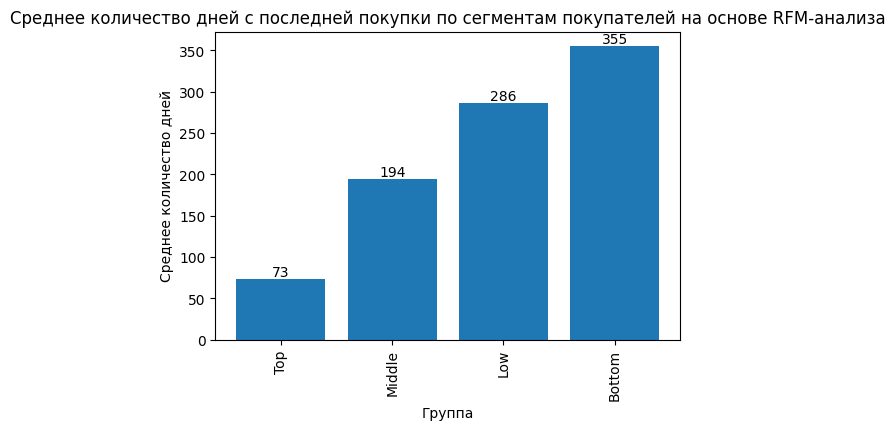

In [202]:
bar(df_rfm.groupby('RFM_level', as_index=False).agg({'recency': lambda x: (round(x.mean()))}),
    'RFM_level',
    'recency',
    'Среднее количество дней с последней покупки по сегментам покупателей на основе RFM-анализа',
    'Группа',
    'Среднее количество дней',
    ascending=True)

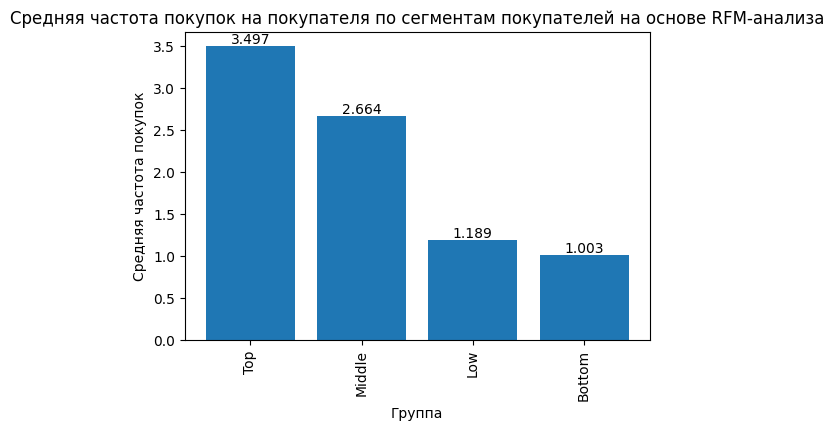

In [203]:
bar(df_rfm.groupby('RFM_level', as_index=False).agg({'frequency': lambda x: (round(x.mean(), 3))}),
    'RFM_level',
    'frequency',
    'Средняя частота покупок на покупателя по сегментам покупателей на основе RFM-анализа',
    'Группа',
    'Средняя частота покупок')

Видим, что клиенты из группы с наивысшим приоритетом часто совершают покупки на большую сумму.

###  <a name=4.5>Популярность категорий по сегментам.</a>

Сравним популярность категорий в кластерах

In [204]:
# Напишем функцию создания матрицы для анализа параметров по кластером с учетом категорий
def append_category(df, df_rfm, column, aggfunc=np.sum):
    # Создадим таблицу количества покупок в каждой категории
    df_pivot = pd.pivot_table(data,
                          index='customer_id',
                          columns='category',
                          values=column,
                          aggfunc=aggfunc,
                          fill_value=0).reset_index()
    df_result = df_rfm.merge(df_pivot, on='customer_id')
    df_result = df_result.groupby('RFM_level').sum().T.loc['гигиена' :]
    return df_result

Посмотрим на количество купленных товаров из различных категорий по группам

In [205]:
df_rfm_quantity = append_category(data, df_rfm, 'quantity')

<ipython-input-204-37e8c32e898e>:11: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



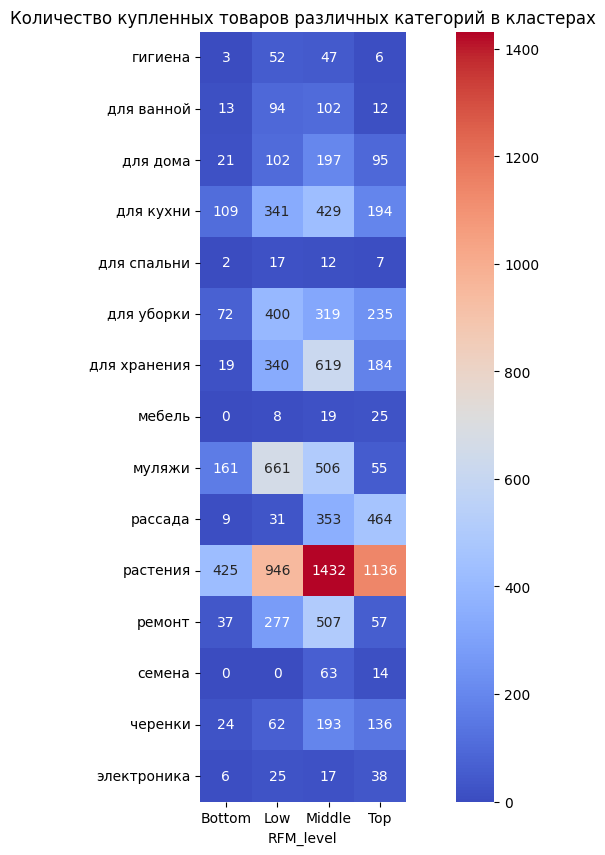

In [206]:
heatmap(df_rfm_quantity,
        'Количество купленных товаров различных категорий в кластерах',
        (13, 10), fmt='.0f')

Рассмотрим 4 кластера в зависимости от приоритета покупателя

Из тепловой карты видно, что самая популярная категория товаров среди всех покупателей по количеству купленных товаров - это растения.

- Другие популярные категории среди клиентов с наивысшим приоритетом - рассада, товары для уборки и кухни
- Среди клиентов со средним приоритетом - товары для хранения, ремонта и муляжи
- Среди клиентов с низким приоритетом - муляжи, товары для уборки и кухни
- Клиенты из последней группы приоритета больше всего покупают растения, муляжи и товары для кухни

Посмотрим на общую выручку по категориям в каждой группе

In [207]:
df_rfm_price = append_category(data, df_rfm, 'price_total')
df_rfm_price['Bottom'] /= df_rfm_price['Bottom'].sum()
df_rfm_price['Low'] /= df_rfm_price['Low'].sum()
df_rfm_price['Middle'] /= df_rfm_price['Middle'].sum()
df_rfm_price['Top'] /= df_rfm_price['Top'].sum()

<ipython-input-204-37e8c32e898e>:11: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



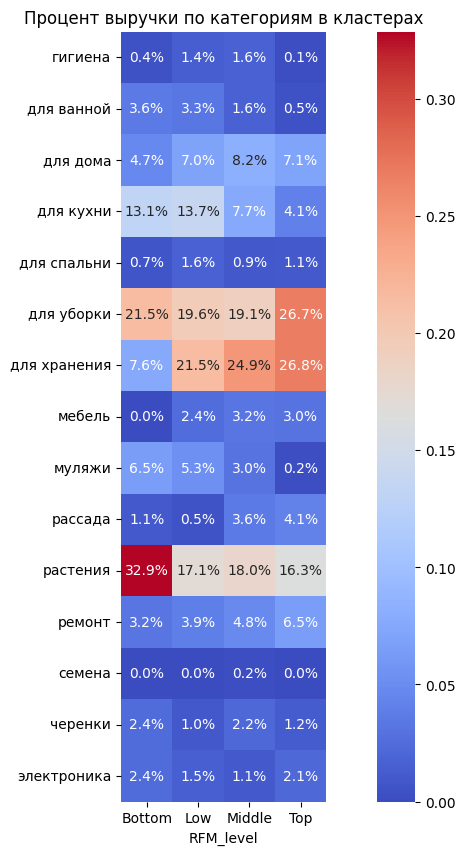

In [208]:
heatmap(df_rfm_price,
        'Процент выручки по категориям в кластерах',
        (13, 10), fmt='.1%')

Из тепловой карты видно:
- В группе с наивысшим приоритетом основную выручку все же приносят товары для хранения, затем - для уборки. А вот растения занимают только третье место по общей выручке, хотя по количеству купленных товаров эта категория лидировала. Это может быть связано со средней ценой товара в категориях.
- В группах со средним и низким приоритетом основную выручку приносят те же категории.
- В группе с самым низким приоритетом большая часть выручки приходится на категорию "растения" (треть всей выручки), затем - товары для уборки и для кухни.

# <a name=5>Анализ и сегментация товаров.</a>

Сгруппируем товары по категориям чтобы исследовать продажи по категориям.

### <a name=5.1> Топ 5 продаваемых товаров в каждой категории.</a>

In [209]:
grouped_by_category = data.groupby('category').agg({'customer_id': 'nunique',
                                                    'price': 'mean',
                                                    'price_total': 'sum'})
grouped_by_category.columns = ['buyers', 'avg_product_price', 'revenue']
grouped_by_category['avg_product_price'] = grouped_by_category['avg_product_price'].astype('float').round(2)
grouped_by_category['revenue'] = grouped_by_category['revenue'].astype('float').round(2)
grouped_by_category['revenue_per_user'] = ((grouped_by_category['revenue'] / grouped_by_category['buyers'])
                                           .astype('float')
                                           .round(2))
grouped_by_category['percent_of_revenue'] = ((grouped_by_category['revenue'] / grouped_by_category['revenue'].sum())
                                             .map('{:.2%}'.format))
grouped_by_category['percent_of_buyers'] = ((grouped_by_category['buyers'] / grouped_by_category['buyers'].sum())
                                            .map('{:.2%}'.format))
grouped_by_category

,buyers,avg_product_price,revenue,revenue_per_user,percent_of_revenue,percent_of_buyers
category,,,,,,
гигиена,29,323.47,29637.00,1021.97,0.90%,0.87%
для ванной,76,398.72,51079.00,672.09,1.56%,2.29%
для дома,239,750.85,241759.50,1011.55,7.38%,7.21%
для кухни,310,427.79,250346.00,807.57,7.64%,9.35%
для спальни,22,1477.82,38067.00,1730.32,1.16%,0.66%
для уборки,545,1092.20,736753.67,1351.84,22.48%,16.44%
для хранения,444,1484.33,800553.25,1803.05,24.43%,13.39%
мебель,41,1832.96,94065.00,2294.27,2.87%,1.24%
муляжи,118,78.31,80000.67,677.97,2.44%,3.56%


Видим, что больше всего покупателей в категории "растения". Выручка больше всего в категориях "для хранения", "для уборки" и "растения".

In [210]:
# Сгруппируем товары
grouped_by_product = data.groupby('product').agg({'customer_id': 'nunique',
                                                  'quantity': 'mean',
                                                  'price': 'mean',
                                                  'category': 'first',
                                                  'price_total': 'sum'}).reset_index().sort_values(by='customer_id',
                                                                                                   ascending=False)
grouped_by_product.columns = ['product', 'buyers', 'avg_quantity', 'price', 'category', 'total_revenue']

In [211]:
print('Кол-во товаров, которые приобрели 5 и более покупателей: {}\n'
      .format(len(grouped_by_product[grouped_by_product['buyers'] >= 5])))

Кол-во товаров, которые приобрели 5 и более покупателей: 192



In [212]:
# Выведем топ 5 товаров в каждой категории по кол-ву покупателей
for category in grouped_by_product['category'].unique():
    print('ТОП-5 {}'.format(category))
    print(*grouped_by_product[grouped_by_product['category']==category]['product'].head(5).to_list(), sep='\n')
    print()

ТОП-5 черенки
Пеларгония розебудная Red Pandora укорененный черенок
Пеларгония розебудная Prins Nikolai укорененный черенок
Пеларгония розебудная Mary укорененный черенок
Пеларгония розебудная Margaretha укорененный черенок
Пеларгония розебудная Queen Ingrid укорененный черенок

ТОП-5 растения
Пеларгония зональная диам. 12 см сиреневый полумахровый
Пеларгония зональная махровая лососевая
Пеларгония зональная диам. 12 см коралловая полумахровая
Пеларгония зональная диам. 12 см темнорозовая полумахровая
Пеларгония зональная диам. 12 см красная махровая

ТОП-5 для хранения
Сумка-тележка 2-х колесная Gimi Argo синяя
Тележка багажная DELTA ТБР-20 синий грузоподъемность 25 кг сумка и 50 кг каркас РОССИЯ
Тележка багажная DELTA ТБР-20 коричневый с оранжевым грузоподъемность 25 кг сумка и 50 кг каркас РОССИЯ
Тележка багажная DELTA ТБР-20 черный с серым грузоподъемность 25 кг сумка 50 кг каркас РОССИЯ
Сумка-тележка 2-х колесная Gimi Argo красная

ТОП-5 для уборки
Сушилка для белья настенная Zalg

### <a name=5.2>Выручка и количество покупателей по категориям.</a>

Графики выручки и количества покупателей по категориям

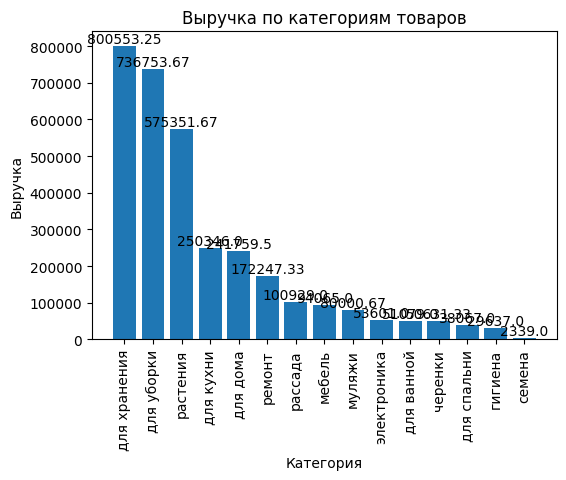

In [213]:
bar(grouped_by_category.reset_index(),
    'category',
    'revenue',
    'Выручка по категориям товаров',
    'Категория',
    'Выручка')

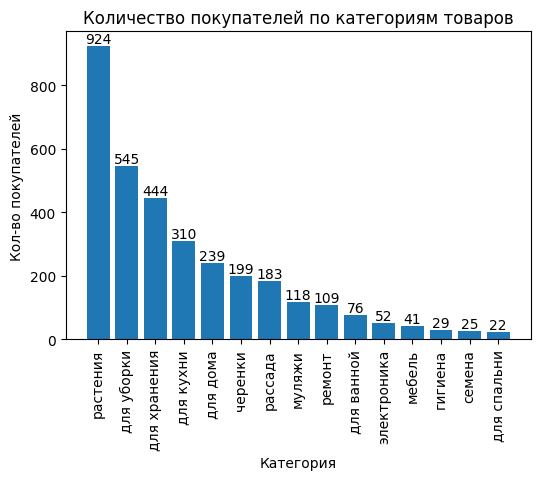

In [214]:
bar(grouped_by_category.reset_index(),
    'category',
    'buyers',
    'Количество покупателей по категориям товаров',
    'Категория',
    'Кол-во покупателей')

Видим, что по общей выручке и по количеству покупателей лидируют категории "для хранения", "для уборки" и "растения"

### <a name=5.3>Сезонность товаров по категориям.</a>

In [215]:
seasonality = (data.groupby('order_id')
               .agg({'category': 'first', 'month': 'first', 'customer_id': 'first'})
               .groupby(['month', 'category'])
               .agg({'customer_id': 'count'})
               .reset_index())
seasonality.columns = ['month', 'category', 'orders']
seasonality.head()

,month,category,orders
0,2018-10,гигиена,3
1,2018-10,для ванной,6
2,2018-10,для дома,19
3,2018-10,для кухни,23
4,2018-10,для спальни,1


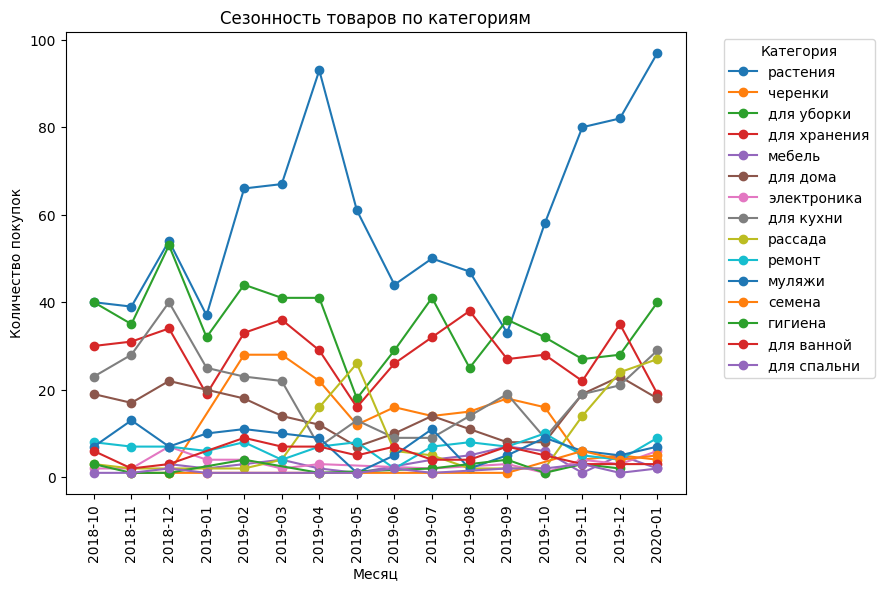

In [225]:
plt.figure(figsize=(8, 6))

# Создание и нанесение линий на график для каждой категории
for category in data['category'].unique():
    seasonality_by_category = seasonality[seasonality['category'] == category]
    plt.plot(seasonality_by_category['month'], seasonality_by_category['orders'], marker='o', label=category)

plt.xlabel('Месяц')
plt.ylabel('Количество покупок')
plt.title('Сезонность товаров по категориям')

# Разворачиваем подписи на оси X вертикально
plt.xticks(rotation=90)

# Размещение легенды справа от графика
plt.legend(title='Категория', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Есть товары с выраженной сезонностью:
- Растения - пик покупок в апреле
- Товары для уборки, для ванной, для дома и муляжи реже всего покупают в мае
- Товары для уборки, дома, спальни, кухни, и электроника - пик покупок в декабре
- Товары для хранения - пик покупок в октябре
- Рассада - пик покупок в мае
- Черенки - пик покупок в феврале
- Товары для ремонта в основном покупают осенью

# <a name=6>Формулирование и проверка статистических гипотез.</a>

Подготовим функции для автоматизации расчетов.

In [217]:
# Добавим номера кластеров к покупателям в основном датафрейме
data = data.merge(df_rfm[['customer_id', 'RFM_level']], on='customer_id')

In [218]:
def shapiro(df, column):
    """
    Проверяет распределение кластеров на нормальность по критерию Шапиро
    """
    clusters = df['RFM_level'].unique()
    for cluster in clusters:
        sample = df[df['RFM_level'] == cluster][column]
        stat, p = st.shapiro(sample)
        if p < 0.05:
            print(f'Кластер {cluster}: гипотеза о нормальности распределения не может быть принята')
        else:
            print(f'Кластер {cluster}: распределение нормальное')

In [219]:
def mannwhitneyu_test(cluster1, cluster2):
    """
    Запускает тест Манна-Уитни для двух кластеров и возвращает p-value
    """
    _, pval = st.mannwhitneyu(cluster1, cluster2)
    return pval

def cluster_comparison_table(df, column):
    """
    Создает таблицу результатов теста Манна-Уитни для всех комбинаций кластеров
    """
    clusters = df['RFM_level'].unique()
    n = len(clusters)
    table = pd.DataFrame(columns=clusters, index=clusters)
    table.fillna('-', inplace=True)
    for i in range(n):
        for j in range(i+1, n):
            data1, data2 = df[df['RFM_level'] == clusters[i]][column], df[df['RFM_level'] == clusters[j]][column]
            pval = mannwhitneyu_test(data1, data2)
            if pval < 0.05:
                result = 'Есть различия'
            else:
                result = 'Нет различий'
            table.iloc[i,j] = result

    table = table.style.applymap(lambda x: 'background-color: salmon' if x == 'Нет различий'
                                      else 'background-color: gold' if x == 'Есть различия'
                                      else 'background-color: white')
    return table

### <a name=6.1>Гипотеза о различиях в среднем чеке в зависимости от кластера.</a>

Проверим данные на нормальность распределения для каждого кластера. Для этого воспользуемся критерием Шапиро-Уилка. Если значение p-value меньше 0.05, то гипотеза о нормальности распределения отклоняется:

In [220]:
shapiro(data, 'price_total')

Кластер Middle: гипотеза о нормальности распределения не может быть принята
Кластер Bottom: гипотеза о нормальности распределения не может быть принята
Кластер Low: гипотеза о нормальности распределения не может быть принята
Кластер Top: гипотеза о нормальности распределения не может быть принята


Результаты показывают, что распределение в каждом кластере не является нормальным.

Теперь сформулируем статистическую и альтернативную гипотезы и проведем тест Манна-Уитни, так как мы имеем несколько категорий и хотим найти различия между ними. В результате получим таблицу результатов сравнения между каждой парой кластеров.

<i>H0 - средние значения чеков между кластерами не имеют статистически значимых различий

H1 - средние значения чеков в кластерах отличаются

In [221]:
cluster_comparison_table(data, 'price_total')

,Middle,Bottom,Low,Top
Middle,-,Есть различия,Есть различия,Есть различия
Bottom,-,-,Есть различия,Нет различий
Low,-,-,-,Есть различия
Top,-,-,-,-


Видим, что между первой и последней группами нет статистически значимой разницы в среднем чеке.

### <a name=6.2>Сезонность товаров по категориям.</a>

Гипотеза о том, что клиенты из одного кластера потребления более склонные делать повторные покупки, чем клиенты из других кластеров

Проверим данные на нормальность распределения для каждого кластера

In [222]:
shapiro(data.groupby('customer_id').agg({'RFM_level': 'first', 'order_id': 'count'}), 'order_id')

Кластер Middle: гипотеза о нормальности распределения не может быть принята
Кластер Bottom: гипотеза о нормальности распределения не может быть принята
Кластер Low: гипотеза о нормальности распределения не может быть принята
Кластер Top: гипотеза о нормальности распределения не может быть принята


Результаты показывают, что распределение в каждом кластере не является нормальным.

Сформулируем гипотезы:

<i>H0 - между кластерами нет статистически значимых различий в склонности к повторным покупкам

H1 - клиенты из одного кластера потребления более склонны делать повторные покупки, чем клиенты из другого кластера

Так как распределения не являются нормальными, будем использовать критерий Манна-Уитни

In [223]:
result = cluster_comparison_table(data.groupby('customer_id').agg({'RFM_level': 'first',
                                                                   'order_id': 'count'}), 'order_id')
result

,Middle,Bottom,Low,Top
Middle,-,Есть различия,Есть различия,Есть различия
Bottom,-,-,Есть различия,Есть различия
Low,-,-,-,Есть различия
Top,-,-,-,-


Как видно из таблицы, все кластеры имеют статистически значимые различия в склонности к повторным покупкам.

 # <a name=7>Выводы.</a>

В рамках проекта сделали сегментацию покупателей с помощью RFM-теста на основе таких показателей, как количество заказов, общая выручка и давность с момента последней покупки.

В ходе сегментации покупателей мы выяснили, что пользователи из всех групп в среднем покупают больше всего товаров из категории "растения", однако наибольшую выручку приносят товары для хранения.

Исходя из этого, для клиентов с наивысшим приоритетом можно направить рассылки по SMS или электронной почте с рекоммендациями на основе истории покупок. В качестве рекомендаций можно выбрать Топ товаров из самой покупаемой клиентом категории. Также можно предлагать им дополнительные бонусы за каждую покупку, чтобы повысить удержание клиентов и стимулировать повторные покупки.

Клиентам со средним приоритетом также можно направить рекоммендации с учетом истории покупок. К тому же, так как это самая многочисленная категория, можно предоставить им скидки или бонусы за рекоммендации товаров друзьям или знакомым, чтобы привлечь новых клиентов.

Клиенты с низким приоритетом обычно не склонны покупать на большую сумму и делать повторные покупки, поэтому можно присылать им уведомления о новых поступлениях или снижении цен на популярные товары в категории, в которой они уже делали покупки.

Примечательно, что средний чек клиентов с низким приоритетом почти не отличается от клиентов с наивысшим приоритетом. Поэтому им можно, например, направить напоминания о товарах, оставленных в корзине чтобы стимулировать их вернуться.

Также можно заметить, что некоторые категории товаров имеют выраженную сезонность, хотя она вполне логична:

- Растения - пик покупок в апреле
- Товары для уборки, для ванной, для дома и муляжи реже всего покупают в мае
- Товары для уборки, дома, спальни, кухни, и электроника - пик покупок в декабре
- Товары для хранения - пик покупок в октябре
- Рассада - пик покупок в мае
- Черенки - пик покупок в феврале
- Товары для ремонта в основном покупают осенью

Исходя из сезонности, можно использовать в качестве рекоммендаций популярные товары из той категории, которая является востребованной в том или ином месяце.